### KNN 사용(불균형데이터 + 교차검증)

In [ ]:
# import package
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

In [ ]:
# train set을 가져옴
training_df =  pd.read_csv('changingjob_train.csv',index_col=0)
training_df.drop('Unnamed: 0.1', axis=1,inplace=True)
training_df.head()

,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,30,NaN,Other,1,36,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,3.0,Pvt Ltd,>4,47,0
2,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,NaN,Other,never,83,0
3,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,30,3.0,Funded Startup,4,8,0
4,city_176,0.764,Other,Has relevent experience,Part time course,Graduate,STEM,11,NaN,Other,1,24,1


In [ ]:
# test set을 가져옴
test_df = pd.read_csv('changingjob_testx.csv',index_col=0)
test_df.drop('Unnamed: 0.1', axis=1,inplace=True)
test_df.head()

,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_128,0.527,Other,Has relevent experience,no_enrollment,Graduate,STEM,4,3.0,Pvt Ltd,4,36
1,city_114,0.926,Other,Has relevent experience,no_enrollment,Graduate,STEM,16,4.0,Pvt Ltd,>4,8
2,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,8.0,Pvt Ltd,4,35
3,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,0,NaN,Other,1,41
4,city_100,0.887,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,5.0,Pvt Ltd,2,17


In [ ]:
test_df['major_discipline'].fillna('UH', inplace=True)
test_df.drop('company_size', axis=1, inplace=True)
test_df.shape

(400, 11)

In [ ]:
training_df['major_discipline'].fillna('UH', inplace=True)
training_df.drop('company_size', axis=1, inplace=True)
training_df.shape

(18126, 12)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
#city
lb_city = LabelEncoder()
test_df['city'] = lb_city.fit_transform(test_df['city'])

#gender
map_class = {'Female':0, 'Other':1, 'Male':2}
test_df[['gender']] = test_df[['gender']].applymap(map_class.get)

#relevent_experience
lb_relevent_experience = LabelEncoder()
test_df['relevent_experience'] = lb_relevent_experience.fit_transform(test_df['relevent_experience'])

#enrolled_university
map_class = {'no_enrollment':0, 'Part time course':1, 'Full time course':2}
test_df[['enrolled_university']] = test_df[['enrolled_university']].applymap(map_class.get)

#education_level
map_class = {'UH':0, 'Graduate':1, 'Masters':2, 'Phd':3}
test_df[['education_level']] = test_df[['education_level']].applymap(map_class.get)

#major_discipline
map_class = {'UH':0, 'Other':1, 'Arts':2, 'Humanities':3, 'Business Degree':4, 'STEM':5}
test_df[['major_discipline']] = test_df[['major_discipline']].applymap(map_class.get)

#company_type
map_class = {'Other':0,'Early Stage Startup':1, 'Funded Startup':2, 'Pvt Ltd':3, 
            'NGO':4, 'Public Sector':5}
test_df[['company_type']] = test_df[['company_type']].applymap(map_class.get)

#last_new_job
map_class = {'never':0, '0':1,'1':2,'2':3, '3':4, '4':5, '>4':6 }
test_df[['last_new_job']] = test_df[['last_new_job']].applymap(map_class.get)

In [ ]:
#city
lb_city = LabelEncoder()
training_df['city'] = lb_city.fit_transform(training_df['city'])

#gender
map_class = {'Female':0, 'Other':1, 'Male':2}
training_df[['gender']] = training_df[['gender']].applymap(map_class.get)

#relevent_experience
lb_relevent_experience = LabelEncoder()
training_df['relevent_experience'] = lb_relevent_experience.fit_transform(training_df['relevent_experience'])

#enrolled_university
map_class = {'no_enrollment':0, 'Part time course':1, 'Full time course':2}
training_df[['enrolled_university']] = training_df[['enrolled_university']].applymap(map_class.get)

#education_level
map_class = {'UH':0, 'Graduate':1, 'Masters':2, 'Phd':3}
training_df[['education_level']] = training_df[['education_level']].applymap(map_class.get)

#major_discipline
map_class = {'UH':0, 'Other':1, 'Arts':2, 'Humanities':3, 'Business Degree':4, 'STEM':5}
training_df[['major_discipline']] = training_df[['major_discipline']].applymap(map_class.get)

#company_type
map_class = {'Other':0,'Early Stage Startup':1, 'Funded Startup':2, 'Pvt Ltd':3, 
            'NGO':4, 'Public Sector':5}
training_df[['company_type']] = training_df[['company_type']].applymap(map_class.get)

#last_new_job
map_class = {'never':0, '0':1,'1':2,'2':3, '3':4, '4':5, '>4':6 }
training_df[['last_new_job']] = training_df[['last_new_job']].applymap(map_class.get)

In [ ]:
X = training_df_df.drop('target', axis=1)
y = training_df['target']
print(X.shape)
print(y.shape)
print('0의 개수', sum(y==0))
print('1의 개수', sum(y==1))

(18126, 11)
(18126,)
0의 개수 13639
1의 개수 4487


In [ ]:
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *

X_resampled, y_resampled = TomekLinks().fit_resample(X,y)
print(X_resampled.shape)
print(y_resampled.shape)
print('0의 개수', sum(y_resampled==0))
print('1의 개수', sum(y_resampled==1))

(16837, 11)
(16837,)
0의 개수 12350
1의 개수 4487


In [ ]:
training_df = X_resampled.join(y_resampled)
training_df

,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,5,0.920,2,0,0,1,5,30,0,2,36,1
1,77,0.776,2,1,0,1,5,15,3,6,47,0
2,64,0.624,1,1,2,1,5,5,0,0,83,0
3,50,0.767,2,0,0,2,5,30,2,5,8,0
4,57,0.764,1,0,1,1,5,11,0,2,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16832,5,0.920,0,1,0,3,5,17,4,5,16,0
16833,64,0.624,1,1,2,0,0,9,0,2,68,1
16834,5,0.920,2,0,0,2,5,30,3,6,110,0
16835,103,0.939,2,0,0,2,5,14,3,2,82,0


In [ ]:
features = ['city_development_Index', 'company_type', 'experience', 'enrolled_university', 'relevent_experience']
X_train = training_df[features]
X_test = test_df[features]
y_train = training_df['target']

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

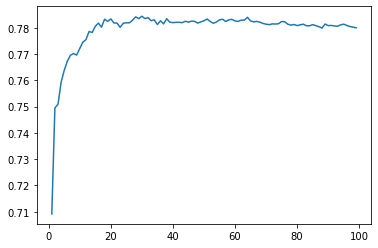

In [ ]:
k_range = np.arange(1,100)
k_scores = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.show()

In [ ]:
result = pd.DataFrame()
result['k'] = k_range
result['accuracy'] = k_scores
result = result.sort_values(by='accuracy', ascending=False).reset_index(drop=True)
result.head()

,k,accuracy
0,30,0.784403
1,28,0.784165
2,64,0.783988
3,32,0.783868
4,29,0.783512


In [ ]:
classifier = neighbors.KNeighborsClassifier(result['k'][0])
classifier.fit(X_train, y_train)
prediction= classifier.predict(X_test)

In [ ]:
y_pred = pd.DataFrame(prediction)
y_pred.columns =['target']
y_pred['index'] = y_pred.index
y_pred = y_pred[['index', 'target']]

y_pred.to_csv("test10.csv", header=True, index=False)